In [2]:
import numpy as np
from skimage import io, filters, exposure
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

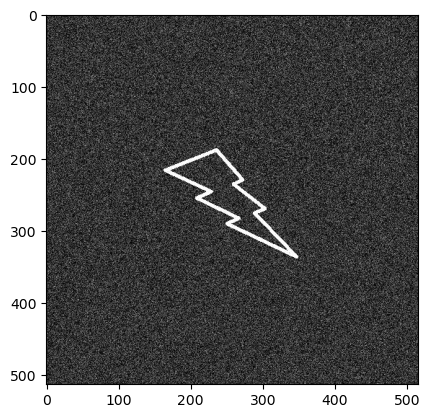

In [8]:
# Load the image
image_path = './Input.jpg'
# read the image using skimage
image = io.imread(image_path)
# show it with matplotlib
plt.imshow(image, cmap='gray')

In [9]:
# If the image is RGB, convert it to grayscale
if image.ndim == 3:
    image = rgb2gray(image)


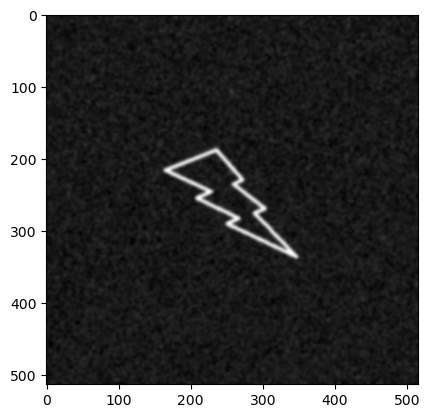

In [10]:
# Apply Gaussian filter for pre-processing
gaussian_filtered = gaussian_filter(image, sigma=2)
# show it with matplotlib
plt.imshow(gaussian_filtered, cmap='gray')

In [11]:
# Calculate the histogram
hist, bin_edges = exposure.histogram(gaussian_filtered, nbins=256, source_range='dtype')

# Normalize the histogram
p = hist / np.sum(hist)

In [12]:
# Init between-class variance storage
sigma_b_squared = np.zeros(256)

In [13]:
# Iterate over all possible thresholds
for t in range(256):
    # Calculate the class probabilities
    w1 = np.sum(p[:t])
    w2 = np.sum(p[t:])

    # Calculate the class means
    if w1 > 0 and w2 > 0:
        mu1 = np.sum(bin_edges[:t] * p[:t]) / w1
        mu2 = np.sum(bin_edges[t:] * p[t:]) / w2
        
        # Calculate the between-class variance
        sigma_b_squared[t] = w1 * w2 * (mu1 - mu2) ** 2

In [14]:
# Find the threshold that maximizes the between-class variance
optimal_threshold = np.argmax(sigma_b_squared)

In [15]:
# Segment the image using the optimal threshold
binary_image = gaussian_filtered > optimal_threshold

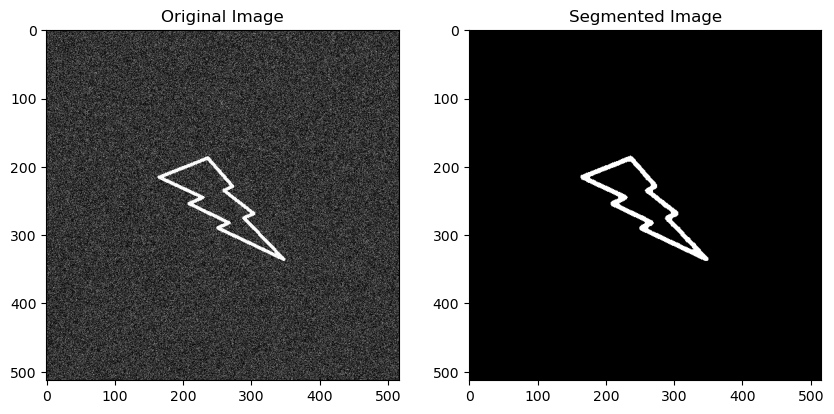

In [16]:
# display both original and segmented image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Segmented Image')

plt.show()


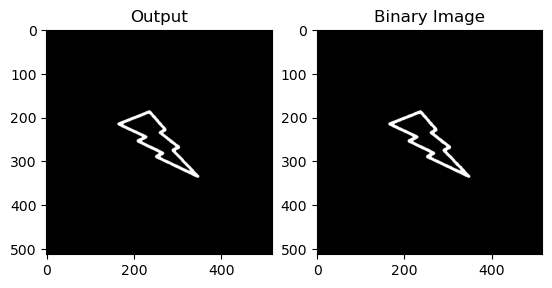

equal? False


In [57]:
# compare the result (Output.png) with our version 
output_path = './Output.png'
output = io.imread(output_path)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(output, cmap='gray')
axes[0].set_title('Output')
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binary Image')
plt.show()

is_equal = np.array_equal(output, binary_image)

print(f"equal? {is_equal}")


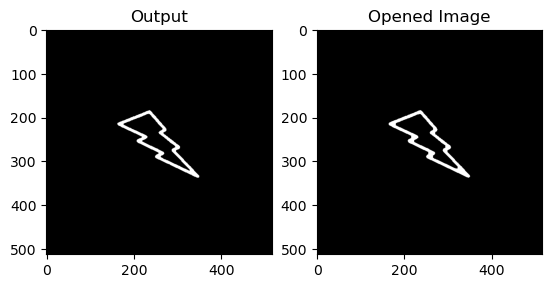

Are the images equal? False
Number of different pixels: 182
Percentage of different pixels: 0.07%


In [56]:
from skimage.morphology import binary_opening, binary_closing, disk, binary_dilation, binary_erosion

# Define structuring element
SE = disk(3)

# Apply closing operation (dilation followed by erosion)
closed = binary_closing(output, SE)

# Apply opening operation (erosion followed by dilation)
opened = binary_opening(closed, SE)

# Apply dilation operation
dilated = binary_dilation(opened, SE)

SE_arbitrary = np.ones((5, 5), dtype=np.uint8)

erosion = binary_erosion(dilated, SE_arbitrary)


# compare the result (Output.png) with our version
fig, axes = plt.subplots(1, 2)
axes[0].imshow(output, cmap='gray')
axes[0].set_title('Output')
axes[1].imshow(erosion, cmap='gray')
axes[1].set_title('Opened Image')
plt.show()

is_equal = np.array_equal(output, erosion)

print(f"Are the images equal? {is_equal}")

# if fail then how many pixels are different
if not is_equal:
    diff = np.sum(output != erosion)
    print(f"Number of different pixels: {diff}")
    # calculate the percentage of different pixels
    percentage = diff / output.size * 100
    print(f"Percentage of different pixels: {percentage:.2f}%")


